## Cours sur la Régression Linéaire Polynomiale

### 1. **Introduction à la Régression Linéaire Polynomiale**

La régression linéaire polynomiale est une extension de la régression linéaire classique. Elle permet de modéliser des relations non linéaires entre les variables indépendantes (caractéristiques) et la variable dépendante (cible) en introduisant des puissances de ces variables indépendantes comme nouvelles caractéristiques.

#### **Forme de l'Équation**
L'équation de la régression linéaire polynomiale d'ordre \( n \) est :

\[
y = a_0 + a_1 x + a_2 x^2 + ... + a_n x^n + \epsilon
\]

où :
- \( y \) est la variable dépendante (cible),
- \( x \) est la variable indépendante (caractéristique),
- \( a_0, a_1, a_n \) sont les coefficients,
- \( \epsilon \) est l'erreur résiduelle.

### 2. **Pourquoi utiliser la Régression Polynomiale ?**

La régression linéaire simple peut être limitée lorsqu'il existe une relation non linéaire entre la variable indépendante et la variable dépendante. La régression polynomiale permet de capturer cette non-linéarité en ajoutant des termes quadratiques, cubiques, ou de degrés supérieurs.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
# Analyse des données
df = pd.read_csv("datasets/regression_polynomiale/graph.csv", sep=";")

In [6]:
df

,Year,Land_Annual
0,1880,-0.62
1,1881,-0.41
2,1882,-0.50
3,1883,-0.59
4,1884,-0.86
...,...,...
134,2014,1.03
135,2015,1.32
136,2016,1.48
137,2017,1.38


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         139 non-null    int64  
 1   Land_Annual  139 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


In [8]:
df.describe()

,Year,Land_Annual
count,139.000000,139.000000
mean,1949.000000,0.078417
std,40.269923,0.502860
min,1880.000000,-0.860000
25%,1914.500000,-0.270000
50%,1949.000000,-0.020000
75%,1983.500000,0.255000
max,2018.000000,1.480000


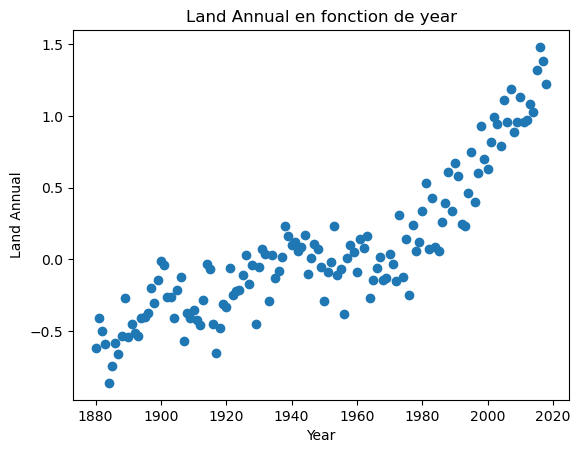

In [9]:
plt.scatter(df['Year'], df['Land_Annual'])
plt.xlabel("Year")
plt.ylabel("Land Annual")
plt.title("Land Annual en fonction de year")
plt.show()

In [10]:
# Extraction de X
X = df[['Year']].values
y = df['Land_Annual']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [13]:
# Déclaration du modèle linéaire
model_lineaire = LinearRegression()

In [14]:
model_lineaire.fit(X_train, y_train)

LinearRegression()

In [15]:
y_linear_pred = model_lineaire.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_linear_pred)
mse

0.06994448932908474

In [17]:
r2_score_linear = r2_score(y_test, y_linear_pred)
r2_score_linear

0.7912270135703445

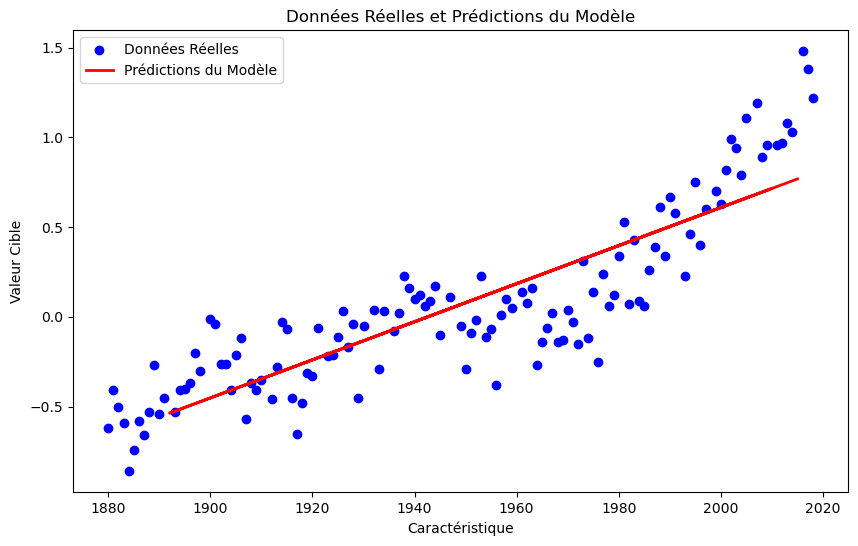

In [19]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Tracer les données réelles
plt.scatter(X_train, y_train, color='blue', label='Données Réelles')

# Tracer les prédictions du modèle
plt.plot(X_test, y_linear_pred, color='red', linewidth=2, label='Prédictions du Modèle')

# Ajouter des labels et un titre
plt.xlabel('Caractéristique')
plt.ylabel('Valeur Cible')
plt.title('Données Réelles et Prédictions du Modèle')
plt.legend()

# Afficher le graphique
plt.show()

In [20]:
### Modèle de dégré 2
polynomial_feature = PolynomialFeatures(degree=2)

In [30]:
X_poly = polynomial_feature.fit_transform(X_train)